In [9]:
from infrastructure.dataclasses import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameteres=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="fast_non_linear_vector_quantile_regression",
    pushforward_operator_parameters=dict(input_dimension=1, embedding_dimension=5, hidden_dimension=100, number_of_hidden_layers=1),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=2000,
        verbose=True,
        optimizer_parameters=dict(lr=0.1),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)

Epoch: 2000, Objective: 2.979, LR: 0.000000: 100%|██████████| 2000/2000 [00:27<00:00, 73.18it/s]


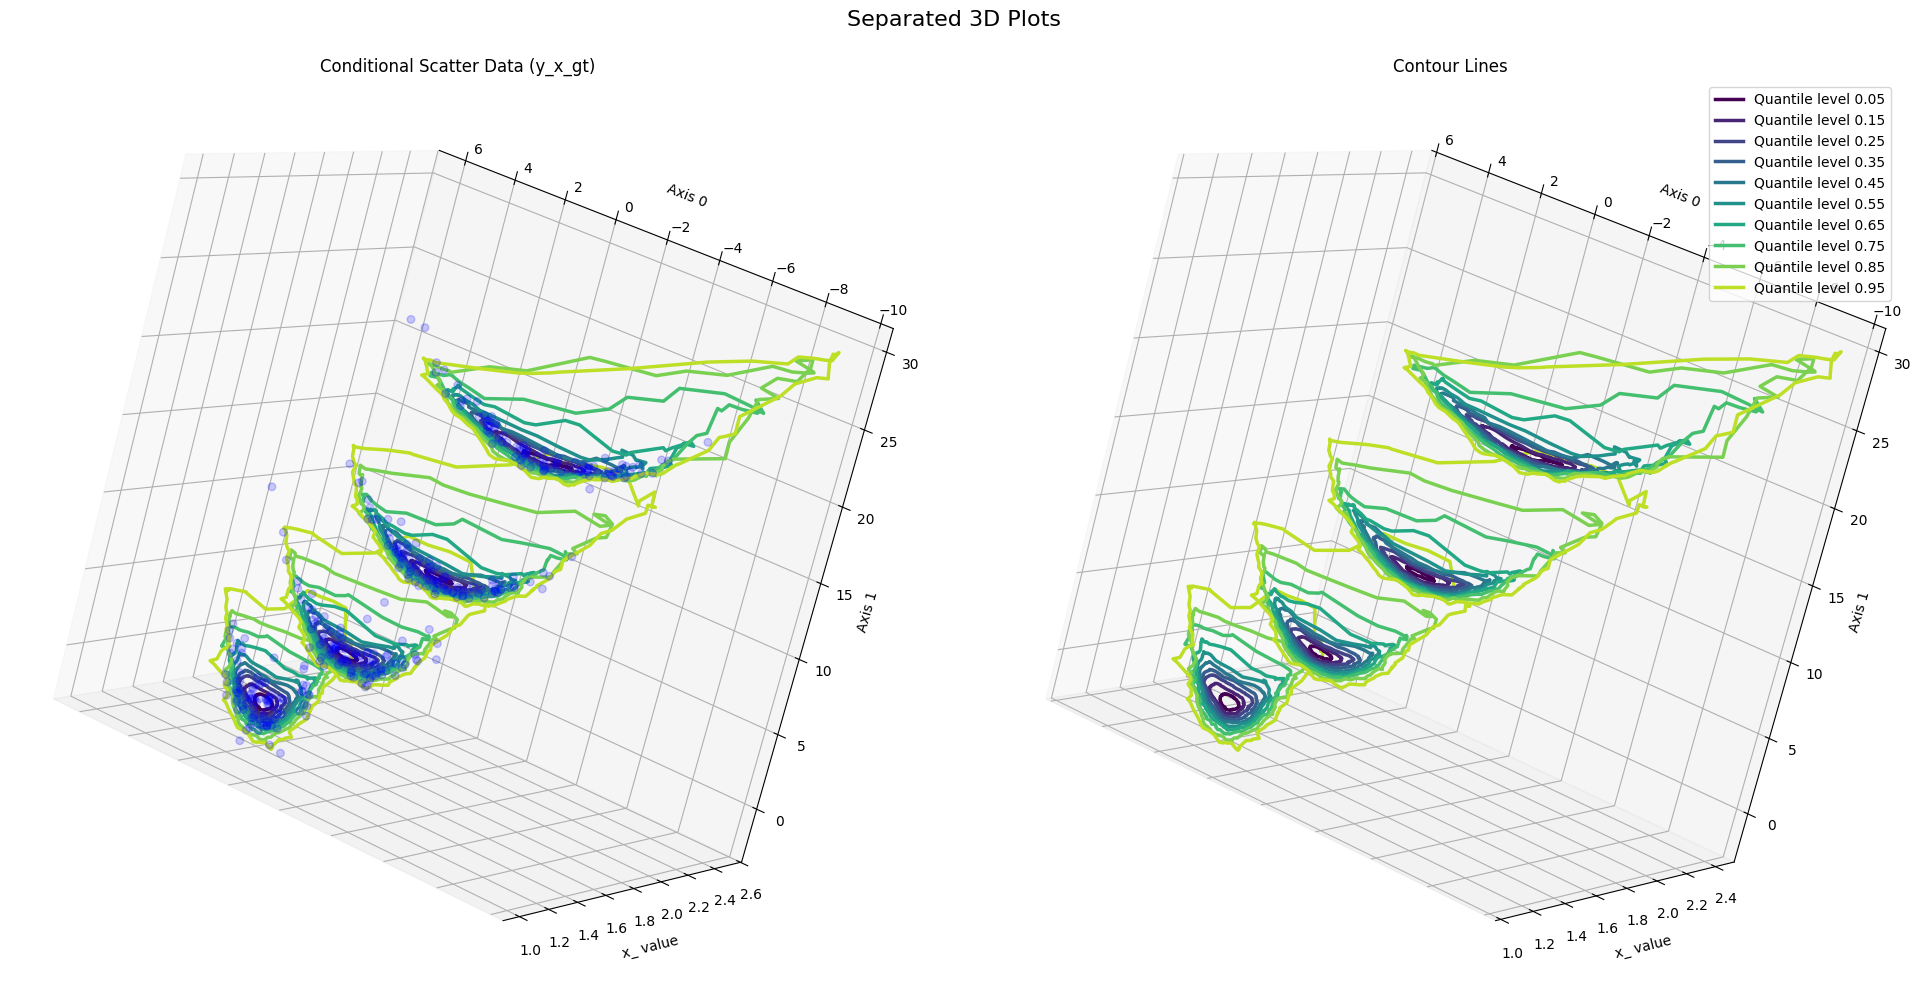

In [11]:
from utils.plot import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=model, number_of_conditional_points=4, number_of_points_to_sample=100, tensor_parameteres=experiment.tensor_parameteres)